# Property Sale Data Analysis

In this notebook, we will analyze the [MA property sale data](https://dlsgateway.dor.state.ma.us/gateway/DLSPublic/ParcelSearch) we have downloaded, for the towns we are interested in.


## Loading sales data


First, we will load the data we have downloaded:


In [1]:
import pandas as pd

df = pd.read_excel("data/LA3ParcelSearch.xlsx", skiprows=4, parse_dates=["Sale Date"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   City/ Town              3464 non-null   object        
 1   Fiscal Year             3464 non-null   int64         
 2   Process                 3464 non-null   object        
 3   Sale Date               3464 non-null   datetime64[ns]
 4   Parcel Id               3464 non-null   object        
 5   Seller                  3464 non-null   object        
 6   Buyer                   3464 non-null   object        
 7   St Num                  3298 non-null   object        
 8   St Alpha                495 non-null    object        
 9   St Name                 3464 non-null   object        
 10  Use Code                3464 non-null   int64         
 11  NAL Code                1652 non-null   object        
 12  Sale Price              3464 non-null   int64   

,City/ Town,Fiscal Year,Process,Sale Date,Parcel Id,Seller,Buyer,St Num,St Alpha,St Name,Use Code,NAL Code,Sale Price,Prior Assessed Value,Current Assessed Value,A/S Ratio,Location Id
0,Greenfield,2016,I,2014-01-07,101 41A 0,WARNER TRACY M,FEDERAL NATIONAL MORTGAGE ASSN,22,,SILVER PL,101,L,113299,119300,118900,1.05,NaN
1,Greenfield,2016,I,2014-01-10,R23 77 0,RICHER BARRY E,KAPITAN ALEX L,95,,COUNTRY CLUB RD,101,NaN,144000,137300,143200,0.99,NaN
2,Greenfield,2016,I,2014-01-16,101 41A 0,FEDERAL NATIONAL MORTGAGE ASSN,ANADON CARLOS L II,22,,SILVER PL,101,S,92000,119300,118900,1.29,NaN
3,Greenfield,2016,I,2014-01-17,79 35 0,BERNIER MARC J,ABRAMSON BRIAN,111,,BEACON ST,101,NaN,250000,210600,220400,0.88,NaN
4,Greenfield,2016,I,2014-01-17,R11 45 0,WADE FRANKLIN E,DEADY THOMAS JAMES,53,,NEWELL POND RD,101,NaN,107500,141200,127000,1.18,NaN


In [2]:
df["Sale Date"].max()

Timestamp('2022-12-30 00:00:00')

Now, lets do some preliminary analysis to see the distribution of it.


In [3]:
import altair as alt

alt.Chart(df).mark_bar().encode(
    alt.X("Sale Date", timeUnit="year").bin(),
    y="count()",
)

alt.Chart(...)

### Data Cleanup


Now let's filter for those that have the required data:


In [4]:
df.dropna(subset=["Location Id", "Sale Date", "Sale Price"], inplace=True)
alt.Chart(df).mark_bar().encode(
    alt.X("Sale Date", timeUnit="year").bin(),
    y="count()",
)

alt.Chart(...)

In [5]:
df["Sale Date"].max()

Timestamp('2022-12-30 00:00:00')

It looks like we have some missing value for the locaiton ID for 2015 and 2017 unfortunately. Oh well!


Now let's join the data with the property data we have from Greenfield:


In [6]:
from load_data import df as prop_df

prop_df = prop_df[prop_df["CITY"] == "GREENFIELD"]

In [7]:
prop_df

,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,USE_DESC,rowid,geom
1625,118000,54700,0,172700,2022,1.22,20120601,154000,101,160 MONTAGUE CITY RD,160,MONTAGUE CITY RD,,GREENFIELD,01301,DIXON DAVID A,160 MONTAGUE CITY ROAD,GREENFIELD,MA,01301,,6194,348,,RA,1952,3550,1,1418,RANCH,1,6,A,1,Single Family Residential,M_111353_925953,"POLYGON ((111389.950 925897.987, 111344.234 92..."
1626,100300,46500,19300,166100,2022,0.38,20050422,178000,101,165 MONTAGUE CITY RD,165,MONTAGUE CITY RD,,GREENFIELD,01301,SALL JEFFREY S,165 MONTAGUE CITY ROAD,GREENFIELD,MA,01301,,4834,64,,RA,1922,1666,1,1212,OLD STYLE,1,7,A,10,Single Family Residential,M_111290_925976,"POLYGON ((111310.832 925961.184, 111280.449 92..."
1627,105700,57600,7100,170400,2022,0.31,20180625,1,101,81 VERNON ST,81,VERNON ST,,GREENFIELD,01301,ELMER TRUSTEE NANCY A,81 VERNON STREET,GREENFIELD,MA,01301,,7213,23,,RA,1951,2100,1,1116,CAPE,1,6,A,100,Single Family Residential,M_109608_928751,"POLYGON ((109631.815 928761.399, 109628.069 92..."
1628,145300,73100,900,219300,2022,0.34,20190709,258000,101,112 BUNGALOW AVE,112,BUNGALOW AVE,,GREENFIELD,01301,MASCOMBER LINDA J,112 BUNGALOW AVENUE,GREENFIELD,MA,01301,,7387,87,,RA,1950,3310,1,1772,CAPE,1,7,A,1000,Single Family Residential,M_110415_929702,"POLYGON ((110435.716 929720.847, 110431.224 92..."
1629,164500,73100,0,237600,2022,0.34,20010731,146500,101,116 BUNGALOW AVE,116,BUNGALOW AVE,,GREENFIELD,01301,KILMINSTER ANNETTE F,116 BUNGALOW AVE,GREENFIELD,MA,01301,,3821,180,,RA,1950,4060,1,1838,RANCH,1,7,A,1001,Single Family Residential,M_110386_929710,"POLYGON ((110380.130 929735.462, 110406.533 92..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,97400,71600,4200,173200,2022,0.22,20200417,203500,101,109 OAKLAND ST,109,OAKLAND ST,,GREENFIELD,01301,HOAD THOMAS,109 OAKLAND STREET,GREENFIELD,MA,01301,,7525,168,,RA,1950,2493,1,1356,RANCH,1,7,A,995,Single Family Residential,M_110350_929673,"POLYGON ((110366.188 929692.577, 110354.680 92..."
8585,175100,73100,1100,249300,2022,0.34,19930820,91500,101,107 OAKLAND ST,107,OAKLAND ST,,GREENFIELD,01301,FLYNN JAMES D,107 OAKLAND ST,GREENFIELD,MA,01301,,,,,RA,1950,3859,1,1656,CAPE,1,8,A,996,Single Family Residential,M_110375_929666,"POLYGON ((110395.297 929684.959, 110383.847 92..."
8586,105900,73100,11200,190200,2022,0.34,20031028,139900,101,99 OAKLAND ST,99,OAKLAND ST,,GREENFIELD,01301,SILVA GLENN J,99 OAKLAND STREET,GREENFIELD,MA,01301,,4457,33,,RA,1950,1853,1,1008,CAPE,1,5,A,997,Single Family Residential,M_110404_929658,"POLYGON ((110424.489 929677.319, 110422.242 92..."
8587,98100,75800,12000,185900,2022,0.54,20161004,1,101,64 GOLD ST,64,GOLD ST,,GREENFIELD,01301,STAIGER BRANDON G & EMILIE R,64 GOLD STREET,GREENFIELD,MA,01301,,6928,178,,RA,1939,2277,1,1170,CAPE,1,6,A,998,Single Family Residential,M_110439_929654,"POLYGON ((110465.474 929675.835, 110460.898 92..."


Let's add a blank sale to the sales for the one we want to predict:


In [8]:
desired_proprety = prop_df[prop_df["FULL_STR"] == "STONE FARM LN"]
desired_id = desired_proprety["rowid"].iloc[0]
new = pd.DataFrame([{"Sale Date": df["Sale Date"].max(), "Location Id": desired_id}])
# Overwrite original dataframe
df = pd.concat([df, new], axis=0)

Let's make sure we only have one row per property id:


In [9]:
prop_df[prop_df.duplicated(subset=["rowid"], keep=False)]

,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,USE_DESC,rowid,geom
1874,0,2580,0,2580,2022,2.30,19590201,0,803,OFF DEERFIELD ST,0,DEERFIELD ST,,GREENFIELD,01301,WESTERN MASS ELECTRIC,P O BOX 270,HARTFORD,CT,06141,,,,,RA,0,0,0,0,,,0,A,1225,Nature Study - areas specifically for nature s...,M_109648_924951,"POLYGON ((109660.907 924865.237, 109653.732 92..."
1882,0,400,0,400,2022,0.01,19720701,0,930,OFF DEERFIELD ST,0,DEERFIELD ST,,GREENFIELD,01301,GREENFIELD TOWN OF,14 COURT SQUARE,GREENFIELD,MA,01301,,,,,GC,0,0,0,0,,,0,A,1233,"Vacant, Selectmen or City Council (Municipal)",M_109648_924951,"POLYGON ((109660.907 924865.237, 109653.732 92..."
1891,149900,0,0,149900,2022,0.00,20160727,0,102,97 BRIAR WAY,97,BRIAR WAY,,GREENFIELD,01301,YERKA DAVID,97 BRIAR WAY,GREENFIELD,MA,01301,,,,,GC,1989,2336,1,1286,CONDO-TNHS,2,5,A,1242,Residential Condominium,M_110132_925379,"POLYGON ((110037.296 925668.449, 110061.903 92..."
1892,137800,0,0,137800,2022,0.00,19920730,64000,102,91 BRIAR WAY,91,BRIAR WAY,,GREENFIELD,01301,KEPLINGER JANE K,91 BRIAR WAY,GREENFIELD,MA,01301,,,,,GC,1989,2070,1,1132,CONDO-TNHS,2,4,A,1243,Residential Condominium,M_110132_925379,"POLYGON ((110037.296 925668.449, 110061.903 92..."
1893,136300,0,0,136300,2022,0.00,19891117,87000,970,87 BRIAR WAY,87,BRIAR WAY,,GREENFIELD,01301,GREENFIELD HOUSING AUTHORITY,1 ELM TERRACE,GREENFIELD,MA,01301,,,,,GC,1989,2070,1,1132,CONDO-TNHS,2,4,A,1244,Housing Authority,M_110132_925379,"POLYGON ((110037.296 925668.449, 110061.903 92..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,191200,0,0,191200,2022,0.00,20140724,180000,102,504 COUNTRY-SIDE,504,COUNTRY-SIDE,,GREENFIELD,01301,SMOLENSKY ELLIOTT R,504 COUNTRY SIDE,GREENFIELD,MA,01301,,6556,190,,RA,1986,2017,1,1606,CONDO-GRDN,2,5,A,956,Residential Condominium,M_109973_929709,"POLYGON ((110103.260 929808.334, 110102.472 92..."
8543,177300,0,0,177300,2022,0.00,20151123,100,102,505 COUNTRY-SIDE,505,COUNTRY-SIDE,,GREENFIELD,01301,WYATT TRUSTEE E VINCENT,505 COUNTRY SIDE ROAD,GREENFIELD,MA,01301,,6781,129,,RA,1986,1802,1,1514,CONDO-GRDN,2,5,A,957,Residential Condominium,M_109973_929709,"POLYGON ((110103.260 929808.334, 110102.472 92..."
8544,188900,0,0,188900,2022,0.00,20030328,149900,102,506 COUNTRY-SIDE,506,COUNTRY-SIDE,,GREENFIELD,01301,GOLDSTEIN GENE J,506 COUNTRYSIDE,GREENFIELD,MA,01301,,4235,104,,RA,1986,1955,1,1667,CONDO-GRDN,2,5,A,958,Residential Condominium,M_109973_929709,"POLYGON ((110103.260 929808.334, 110102.472 92..."
8545,183800,0,0,183800,2022,0.00,20190507,190000,102,507 COUNTRY-SIDE,507,COUNTRY-SIDE,,GREENFIELD,01301,DEIGNAN CHRISELLE B,507 COUNTRY SIDE ROAD,GREENFIELD,MA,01301,,7357,334,,RA,1986,1922,1,1634,CONDO-GRDN,2,5,A,959,Residential Condominium,M_109973_929709,"POLYGON ((110103.260 929808.334, 110102.472 92..."


Let's just drop any that are duplicates, since I am unclear which one was sold, from both DFs.


In [10]:
all_duplicates = set(
    prop_df[prop_df.duplicated(subset=["rowid"], keep="first")]["rowid"]
)
print(
    f"We have {len(all_duplicates)} out of {len(prop_df)} properties with duplicate rowids"
)
prop_df = prop_df[~prop_df["rowid"].isin(all_duplicates)]

sales_with_duplicate_properties = df["Location Id"].isin(all_duplicates)
df = df[~sales_with_duplicate_properties]
print(
    f"We have {sum(sales_with_duplicate_properties)} out of {len(sales_with_duplicate_properties)} sales with duplicate rowids"
)

We have 92 out of 6964 properties with duplicate rowids
We have 149 out of 2331 sales with duplicate rowids


In [12]:
joined = (
    prop_df.set_index("rowid")
    .join(df.set_index("Location Id"), how="inner", validate="one_to_many")
    .reset_index()
)
joined.info()
joined.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   1748 non-null   object        
 1   BLDG_VAL                1748 non-null   int64         
 2   LAND_VAL                1748 non-null   int64         
 3   OTHER_VAL               1748 non-null   int64         
 4   TOTAL_VAL               1748 non-null   int64         
 5   FY                      1748 non-null   int64         
 6   LOT_SIZE                1748 non-null   float64       
 7   LS_DATE                 1748 non-null   object        
 8   LS_PRICE                1748 non-null   int64         
 9   USE_CODE                1748 non-null   object        
 10  SITE_ADDR               1748 non-null   object        
 11  ADDR_NUM                1748 non-null   object        
 12  FULL_STR                1748 non-null   

,index,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,USE_DESC,geom,City/ Town,Fiscal Year,Process,Sale Date,Parcel Id,Seller,Buyer,St Num,St Alpha,St Name,Use Code,NAL Code,Sale Price,Prior Assessed Value,Current Assessed Value,A/S Ratio
0,M_105644_925870,96900,99900,0,196800,2022,5.45,20200601,164500,101,28 B OLD ALBANY RD,28 B,OLD ALBANY RD,,GREENFIELD,01301,SCHOFIELD SARA J,28B OLD ALBANY ROAD,GREENFIELD,MA,01301,,7532,183,,RC,1928,2278,1,1030,RANCH,1,5,A,6597,Single Family Residential,"POLYGON ((105788.437 926028.566, 105785.006 92...",Greenfield,2022.0,C,2020-06-01,R39-4B-0,GILBERT ALEXANDER M,SCHOFIELD SARA J,28,B,OLD ALBANY RD,101.0,NaN,164500.0,196800.0,171400.0,1.04
1,M_105893_926268,172300,115100,9000,296400,2022,12.39,20101112,1,101,19 OLD ALBANY RD,19,OLD ALBANY RD,,GREENFIELD,01301,SANBORN DIANE E,19 OLD ALBANY RD,GREENFIELD,MA,01301,,5939,174,,RC,1979,4096,1,1379,RANCH,1,5,A,6605,Single Family Residential,"POLYGON ((106068.939 926248.168, 106021.816 92...",Greenfield,2024.0,I,2022-09-07,R39-8-0,SANBORN DIANE E,MORGAN SARAH ANN,19,NaN,OLD ALBANY RD,101.0,NaN,439000.0,360000.0,379100.0,0.86
2,M_105968_925863,0,84100,0,84100,2022,1.05,20170804,415000,130,98 OLD ALBANY RD,98,OLD ALBANY RD,,GREENFIELD,01301,POGGI JR DANIEL J,98 OLD ALBANY ROAD,GREENFIELD,MA,01301,,7072,227,,RC,0,0,0,0,,,0,A,6589,Developable Residential Land,"POLYGON ((106002.798 925898.718, 105982.285 92...",Greenfield,2020.0,I,2017-08-04,R39-3-0,ERICSON ROBERT J,POGGI JR DANIEL J,98,NaN,OLD ALBANY RD,106.0,V,415000.0,73300.0,84100.0,0.20
3,M_106580_926009,373800,120800,26500,521100,2022,11.26,20201022,732620,101,185 A OLD ALBANY RD,185 A,OLD ALBANY RD,,GREENFIELD,01301,ERICKSON THOMAS J,185A OLD ALBANY ROAD,GREENFIELD,MA,01301,US,7633,188,,RC,1900,4433,1,2300,COLONIAL,2,8,A,6626,Single Family Residential,"POLYGON ((106685.350 925958.629, 106677.239 92...",Greenfield,2022.0,C,2020-10-22,R40-22-0,PATTESON DAVID B,ERICKSON THOMAS J,185,A,OLD ALBANY RD,101.0,NaN,732620.0,515500.0,631700.0,0.86
4,M_106688_929995,303500,96871,13400,413771,2022,43.61,20000804,255000,016,638 COLRAIN RD,638,COLRAIN RD,,GREENFIELD,01301,STARKEY RICHARD,638 COLRAIN RD,GREENFIELD,MA,01301,,3660,194,,RC,1747,5028,1,3520,COLONIAL,2,11,A,6459,"Mixed Use (Primarily Residential, some Forest)","POLYGON ((106816.230 930089.928, 106836.591 92...",Greenfield,2023.0,I,2021-05-24,R11 20,SENECA REALTY LLC,MENIER AMANDA LYNN,271,NaN,LOG PLAIN RD,101.0,NaN,235000.0,189700.0,208500.0,0.89


Let's remove the columns we don't need:


### Splitting Land/House Values in Sales


Now let's try to guess at the split between land/housing value for each sale. First, we compute percent of the value that is land, then the sale price for


In [13]:
joined["percent land"] = joined["LAND_VAL"] / joined["TOTAL_VAL"]
joined["land sale"] = joined["percent land"] * joined["Sale Price"]
joined["house sale"] = joined["Sale Price"] - joined["land sale"]

Exclude those with no house or no land:


In [14]:
# joined = joined.query("1000 < `land sale`").query("1000 < `house sale`")

### Exploratory Data Analysis

Now let's do some exploratory data analysis to see if we can find any interesting patterns in the data.


In [15]:
# from ydata_profiling import ProfileReport


# report = ProfileReport(joined.drop(columns=["geom"]))
# report.save_file("sales.html")

## Model Fitting

First, let's drop any columns we don't want to use for fitting:


In [73]:
joined["sale year"] = joined["Sale Date"].dt.year

In [74]:
X = joined[
    [
        "LAND_VAL",
        "BLDG_VAL",
        "OTHER_VAL",
        "TOTAL_VAL",
        "LOT_SIZE",
        "USE_CODE",
        "ZONING",
        "YEAR_BUILT",
        "UNITS",
        "RES_AREA",
        "STYLE",
        "STORIES",
        "NUM_ROOMS",
        "LOT_UNITS",
        "sale year",
    ]
]


y = joined["Sale Price"].dropna()

X.head()

,LAND_VAL,BLDG_VAL,OTHER_VAL,TOTAL_VAL,LOT_SIZE,USE_CODE,ZONING,YEAR_BUILT,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,sale year
0,99900,96900,0,196800,5.45,101,RC,1928,1,1030,RANCH,1,5,A,2020
1,115100,172300,9000,296400,12.39,101,RC,1979,1,1379,RANCH,1,5,A,2022
2,84100,0,0,84100,1.05,130,RC,0,0,0,,,0,A,2017
3,120800,373800,26500,521100,11.26,101,RC,1900,1,2300,COLONIAL,2,8,A,2020
4,96871,303500,13400,413771,43.61,016,RC,1747,1,3520,COLONIAL,2,11,A,2021


In [75]:
import evalml
from evalml import AutoMLSearch
from evalml.utils import infer_feature_types

X = infer_feature_types(
    X,
    feature_types={
        "USE_CODE": "categorical",
    },
)
X.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
LAND_VAL,int64,Integer,['numeric']
BLDG_VAL,int64,Integer,['numeric']
OTHER_VAL,int64,Integer,['numeric']
TOTAL_VAL,int64,Integer,['numeric']
LOT_SIZE,float64,Double,['numeric']
USE_CODE,category,Categorical,['category']
ZONING,category,Categorical,['category']
YEAR_BUILT,int64,Integer,['numeric']
UNITS,int64,Integer,['numeric']


In [76]:
is_target = (
    X["TOTAL_VAL"]
    == prop_df[prop_df["FULL_STR"] == "STONE FARM LN"]["TOTAL_VAL"].iloc[0]
)

X, X_target = X[~is_target], X[is_target]
X_target

,LAND_VAL,BLDG_VAL,OTHER_VAL,TOTAL_VAL,LOT_SIZE,USE_CODE,ZONING,YEAR_BUILT,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,sale year
1602,194800,215400,0,410200,32.59,109,RA,1900,2,4458,DUPLEX 2S,2,10,A,2022


In [77]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(
    X, y, problem_type="regression", test_size=0.2
)

In [89]:
automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="regression",
    max_batches=10,
    max_iterations=100,
    optimize_thresholds=True,
)

automl.search()

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.538e+14, tolerance: 2.470e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.475e+14, tolerance: 1.937e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1419
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 35
[LightGBM] [Info] Start training from score 515757.312567
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 33
[LightGBM] [Info] Start training from score 484096.471536
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 35
[LightGBM] [In

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+14, tolerance: 2.470e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.327e+14, tolerance: 1.937e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 24
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 515757.312567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.603e+14, tolerance: 2.470e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+14, tolerance: 1.937e+11

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 24
[LightGBM] [Info] Start training from score 515757.312567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/usr/local/Caskroom/miniconda/base/envs/property-data/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+11, tolerance: 1.937e+11



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 24
[LightGBM] [Info] Start training from score 515757.312567
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1402
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 24
[LightGBM] [Info] Start training from score 484096.471536
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 24
[LightGBM] [In

{1: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + One Hot Encoder + Standard Scaler': '00:01',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + One Hot Encoder': '00:01',
  'Total time of batch': '00:02'},
 2: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + One Hot Encoder + Standard Scaler + RF Regressor Select From Model': '00:01',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + One Hot Encoder + RF Regressor Select From Model': '00:01',
  'Total time of batch': '00:02'},
 3: {'Decision Tree Regressor w/ Select Columns By Type Transformer + Replace Nullable Types Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Replace Nullable Types Transformer + Imputer + One Hot Encoder': '00:00',
  'Extra Trees Regressor w/ Select Columns By Type Transformer + Replace Nullable Types Transformer + Imputer + Select Columns Transformer + Select Columns Trans

In [90]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,67,LightGBM Regressor w/ Select Columns By Type T...,67,0.207572,0.207572,0.101646,3301.030430,False,{'Numeric Pipeline - Select Columns By Type Tr...
2,50,Elastic Net Regressor w/ Select Columns By Typ...,50,0.200044,0.200044,0.180656,3184.931330,False,{'Numeric Pipeline - Select Columns By Type Tr...
16,3,Elastic Net Regressor w/ Replace Nullable Type...,3,0.180519,0.180519,0.181588,2883.833730,False,{'Imputer': {'categorical_impute_strategy': 'm...
18,1,Elastic Net Regressor w/ Replace Nullable Type...,1,0.179515,0.179515,0.181080,2868.358883,False,{'Imputer': {'categorical_impute_strategy': 'm...
38,27,Random Forest Regressor w/ Select Columns By T...,27,0.162155,0.162155,0.115447,2600.637094,False,{'Numeric Pipeline - Select Columns By Type Tr...
55,4,Random Forest Regressor w/ Replace Nullable Ty...,4,0.086529,0.086529,0.162997,1434.392457,False,{'Imputer': {'categorical_impute_strategy': 'm...
58,2,Random Forest Regressor w/ Replace Nullable Ty...,2,0.081206,0.081206,0.163755,1352.303511,False,{'Imputer': {'categorical_impute_strategy': 'm...
85,8,CatBoost Regressor w/ Select Columns By Type T...,8,0.049226,0.049226,0.008002,859.121483,False,{'Numeric Pipeline - Select Columns By Type Tr...
91,0,Mean Baseline Regression Pipeline,0,-0.006485,-0.006485,0.005534,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}
94,7,XGBoost Regressor w/ Select Columns By Type Tr...,7,-0.060057,-0.060057,0.232930,-826.162615,False,{'Numeric Pipeline - Select Columns By Type Tr...


In [91]:
from evalml.objectives import get_optimization_objectives
from evalml.problem_types import ProblemTypes

for objective in get_optimization_objectives(ProblemTypes.REGRESSION):
    print(objective.name)

ExpVariance
MaxError
MedianAE
MSE
MAE
R2
Root Mean Squared Error


In [92]:
pipeline = automl.best_pipeline
pipeline.score(X_holdout, y_holdout, ["ExpVariance"])

OrderedDict([('ExpVariance', 0.08927798951926058)])

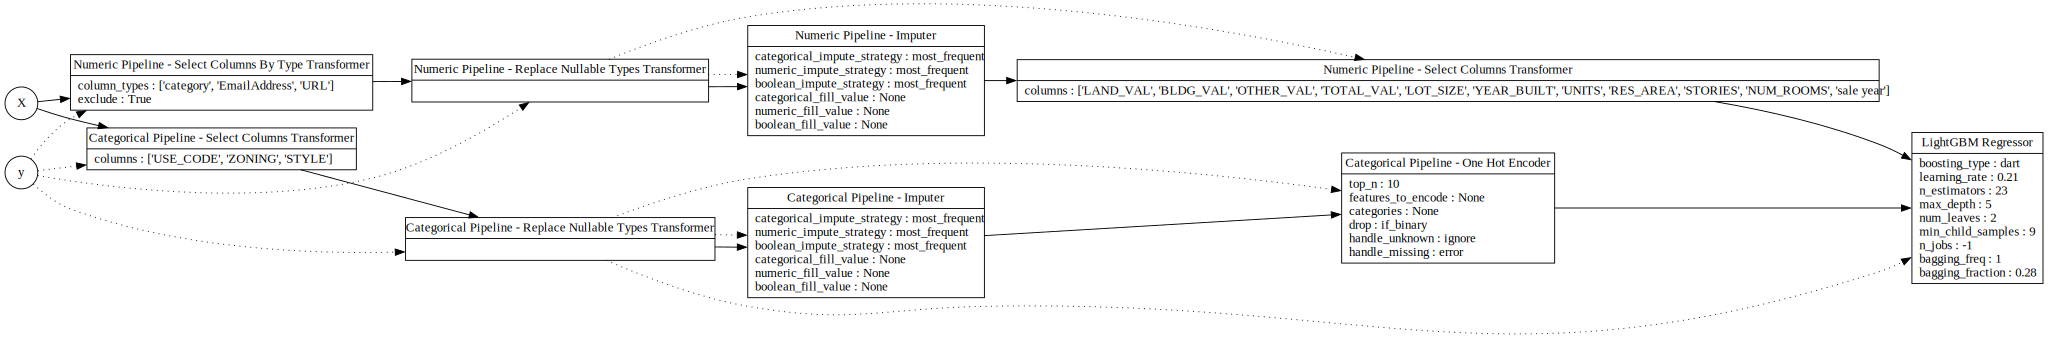

In [93]:
pipeline.graph()

In [94]:
pipeline.feature_importance

,feature,importance
0,OTHER_VAL,7
1,LAND_VAL,6
2,BLDG_VAL,5
3,ZONING_PI,2
4,TOTAL_VAL,1
5,YEAR_BUILT,1
6,RES_AREA,1
7,LOT_SIZE,0
8,UNITS,0
9,STORIES,0


In [95]:
from evalml.model_understanding import readable_explanation

readable_explanation(
    pipeline,
    X_holdout,
    y_holdout,
    # objective="log loss binary",
    # importance_method="permutation",
)

LightGBM Regressor: The prediction of Sale Price as measured by R2 is heavily influenced by OTHER_VAL, TOTAL_VAL, and ZONING, and is somewhat influenced by BLDG_VAL and LAND_VAL.
The features RES_AREA and YEAR_BUILT detracted from model performance. We suggest removing these features.


In [96]:
from evalml.model_understanding.visualizations import graph_prediction_vs_actual

graph_prediction_vs_actual(y_holdout, pipeline.predict(X_holdout), outlier_threshold=50)

In [97]:
pd.concat([X_holdout, X_target], axis=0)

,LAND_VAL,BLDG_VAL,OTHER_VAL,TOTAL_VAL,LOT_SIZE,USE_CODE,ZONING,YEAR_BUILT,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,sale year
1169,57500,256500,14000,328000,0.30,101,RA,1922,1,2091,OLD STYLE,2,7,A,2022
1036,62600,136500,12200,211300,1.54,101,RA,1900,1,3940,COLONIAL,2,12,A,2018
988,312900,1802000,28300,2143200,1.28,325,LC,2005,0,14012,STORE,1,0,A,2020
1747,6800,0,0,6800,0.40,132,RC,0,0,0,,<NA>,0,A,2020
1188,83700,328200,0,411900,0.94,101,RC,2019,1,2936,COLONIAL,2,0,A,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,159975,1028775,27075,1215825,4.65,400,PI,1989,0,31375,INDUSTRIAL,1,0,A,2017
1599,22900,0,0,22900,0.22,130,GC,0,0,0,,<NA>,0,A,2022
1157,76400,119000,6200,201600,1.60,101,RC,1938,1,1344,CAPE,1,5,A,2018
1064,104000,0,0,104000,0.19,390,LC,0,0,0,,<NA>,0,A,2019


In [98]:
pipeline.predict(pd.concat([X_holdout, X_target], axis=0))

1169    2.378593e+05
1036    2.378593e+05
988     3.651354e+06
1747    2.378593e+05
1188    3.697661e+05
            ...     
1714    3.606659e+06
1599    2.378593e+05
1157    2.378593e+05
1064    2.997839e+05
1602    1.220517e+06
Name: Sale Price, Length: 351, dtype: float64